In [1]:
from datascience import *
import numpy as np
## Normal Distribution
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# helper methods:

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

## Regression Line

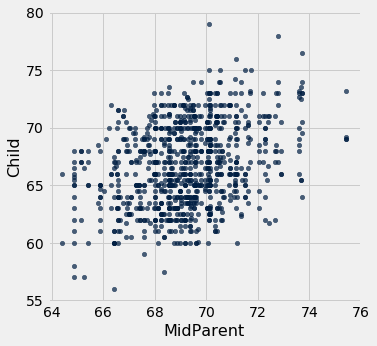

In [3]:
# Reminder:

#http://inferentialthinking.com/notebooks/galton.csv
galton = Table.read_table('galton.csv')



heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

heights.scatter(0)


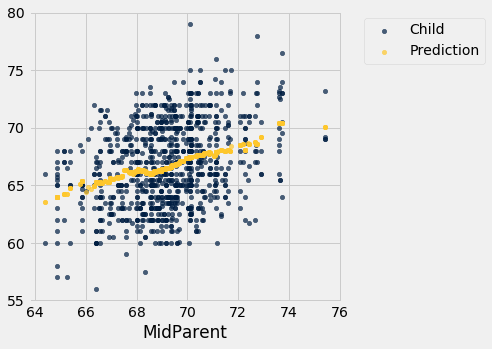

In [10]:
#prediction

def predict_child(parent):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of parent.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    close_points = heights.where('MidParent', are.between(parent - .5, parent + .5))
    return close_points.column('Child').mean()

heights_and_predict = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

heights_and_predict.scatter(0)

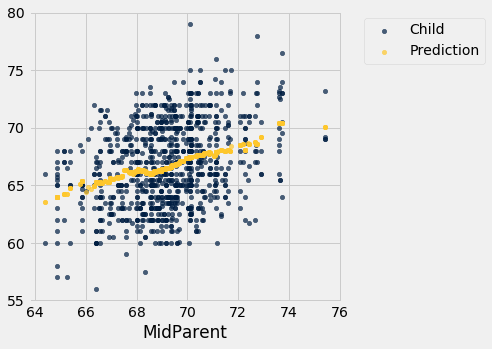

In [11]:
#Trying to discover equation for yellow curve - would like a perfect line

heights_and_predict.scatter(0)

In [12]:
# How strong is the linear trend?

correlation(heights_and_predict, 'MidParent', 'Child')

0.32094989606395924

(-4, 4)

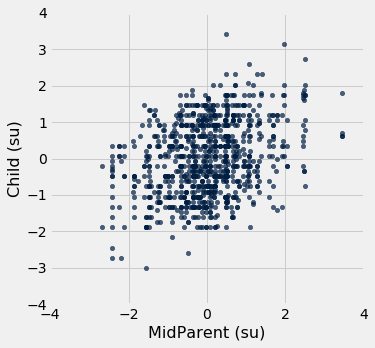

In [13]:
# We take our heights and convert them to standard units:

standardize(heights).scatter(0)
plots.xlim(-4, 4)
plots.ylim(-4, 4)

In [ ]:
# When converting to standard units, only axes change, shape is same

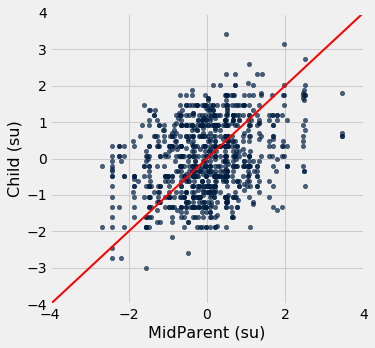

In [14]:
# Plot a natural line of symmetry, 45 degree angle - is this a good prediction line?

standardize(heights).scatter(0)
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.plot([-4, 4], [-4, 4], color='r', lw=2)


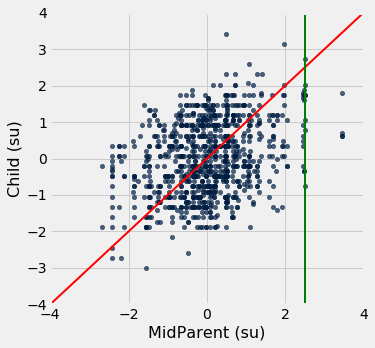

In [15]:
# green line: drawn at particular x value that I want to predict

standardize(heights).scatter(0)
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.plot([-4, 4], [-4, 4], color='r', lw=2)
plots.plot([2.5, 2.5], [-4, 4], color='g', lw=2)

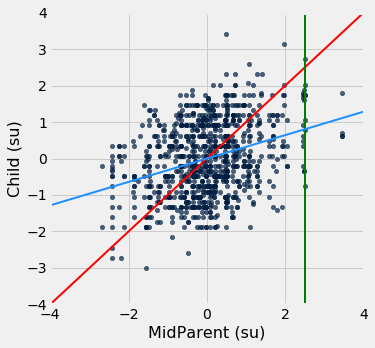

In [16]:
#blue line goes through centers of vertical strips - it is flatter

standardize(heights).scatter(0)
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.plot([-4, 4], [-4, 4], color='r', lw=2)
plots.plot([2.5, 2.5], [-4, 4], color='g', lw=2)

r = correlation(heights, 0, 1)
plots.plot([-4, 4], [-4*r, 4*r], color='dodgerblue', lw=2)

In [ ]:
# notice that blue and red lines both go through (0,0)

# What is slope of blue line? 

# Positive or negative? 

# More or less than one?

# blue line is called a regression line, goes through middle points

# Can you find equation of a line that goes through origin with a given slope?

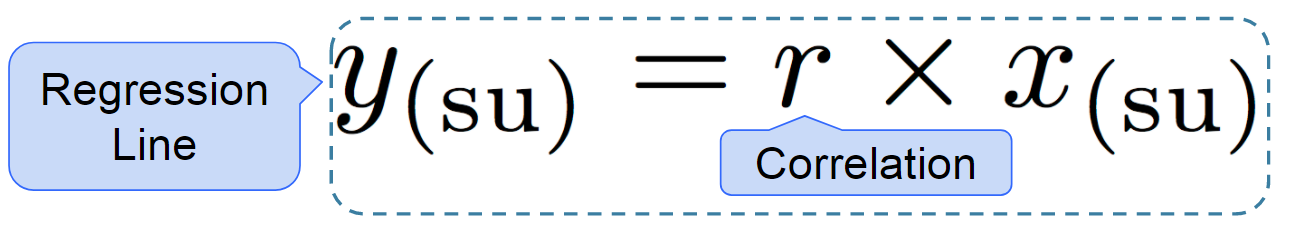

In [17]:
Image("image3.png", width=700, height=150)

In [ ]:
# Consider height of child whose parents are extremely tall

# (back to slides - graph of averages)

## Regression Line for Prediction

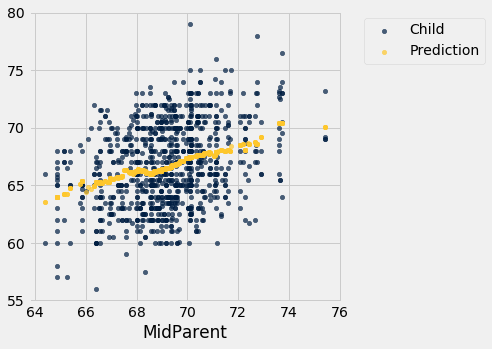

In [18]:
# Question: How does the regression line compare to our original prediction?

heights_and_predict.scatter(0)

In [19]:
r = correlation(heights_and_predict, 'MidParent', 'Child')
parent_mean = np.mean(heights.column('MidParent'))
parent_sd = np.std(heights.column('MidParent'))
child_mean = np.mean(heights.column('Child'))
child_sd = np.std(heights.column('Child'))

print('Parent: mean =', parent_mean, '; SD =', parent_sd)
print(' Child: mean =', child_mean, '; SD =', child_sd)
print('     r:', r)

Parent: mean = 69.2067730193 ; SD = 1.80140509692
 Child: mean = 66.7459314775 ; SD = 3.57733460101
     r: 0.320949896064


In [21]:
def predict_with_r(parent):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of parent, 
    using linear regression.
    """
    parent_su = (parent - parent_mean) / parent_sd  #convert to su
    child_su = r * parent_su                        #regression line
    return child_su * child_sd + child_mean         # prediction in converted units

In [22]:
# Parent -> child (below the parents' height)

predict_with_r(68)

65.976781543514321

In [23]:
# Parent -> child (below the parents' height)

predict_with_r(74)

69.800946925331189

In [24]:
# Parent -> child 

predict_with_r(60)

60.877894367758486

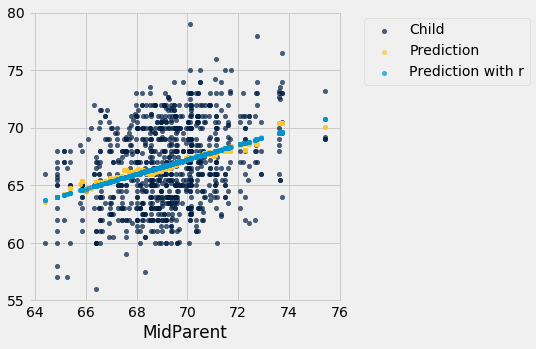

In [25]:
#Now with all the midparent heights

heights_and_predict.with_column(
    'Prediction with r', 
    heights_and_predict.apply(predict_with_r, 'MidParent')).scatter(0)


In [ ]:
#(back to slides - slope and intercept)

## Slope and Intercept

In [26]:
# How to work in original units?

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)"""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)"""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))


5067.66110596 -21282.1740687


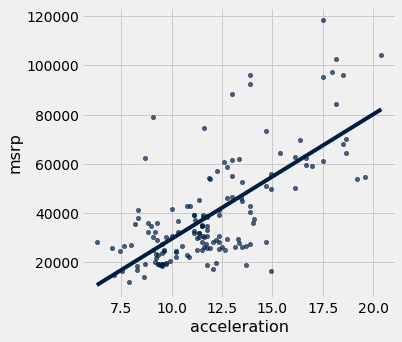

In [27]:
hybrid = Table.read_table('hybrid.csv')
hybrid

#note: fit_line = True
hybrid.scatter('acceleration', 'msrp', fit_line = True)

# Make predictions with the line y=ax+b

a = slope(hybrid, 'acceleration', 'msrp')
b = intercept(hybrid, 'acceleration', 'msrp')

print(a, b)

In [28]:
# Predict the retail price of a hybrid with acceleration of 12.5

a*12.5+b

42063.589755741108

In [ ]:
# For each m/s**2 how does the price change?

## Least Squares

In [29]:
#little_women = Table.read_table('http://inferentialthinking.com/notebooks/little_women.csv')
little_women = Table.read_table('little_women.csv')

little_women = little_women.move_to_start('Periods')
little_women.show(3)

Periods,Characters
189,21759
188,22148
231,20558


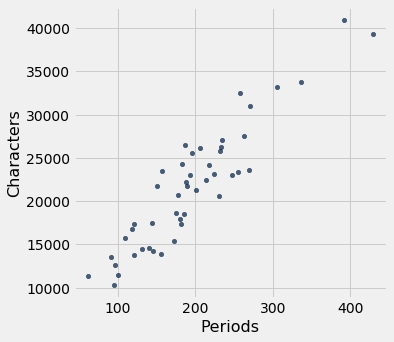

In [30]:
little_women.scatter('Periods', 'Characters')

In [31]:
# What correlation do you expect?

correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

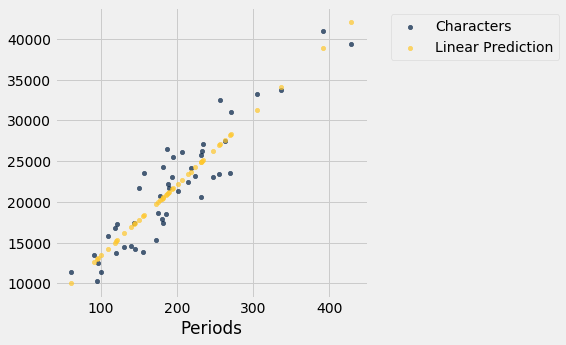

In [32]:
# helper method

def fit(t, x, y):
    """Return the predicted y-value for each x-value"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

fitted = fit(little_women, 'Periods', 'Characters')  # array of predictions predictions

lw_with_predictions = little_women.with_column('Linear Prediction', fitted) #table
lw_with_predictions.scatter('Periods')  #plot

In [33]:
# errors: 

actual = lw_with_predictions.column('Characters')
predicted = lw_with_predictions.column('Linear Prediction')
errors = actual - predicted

lw_with_predictions.with_column("Error", errors)

Periods,Characters,Linear Prediction,Error
189,21759,21183.6,575.403
188,22148,21096.6,1051.38
231,20558,24836.7,-4278.67
195,25526,21705.5,3820.54
255,23395,26924.1,-3529.13
140,14622,16921.7,-2299.68
131,14431,16138.9,-1707.88
214,22476,23358,-882.043
337,33767,34056.3,-289.317
185,18508,20835.7,-2327.69


In [34]:
#function to draw errors

sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    print('Slope of Regression Line:    ', np.round(slope), 'characters per period')
    print('Intercept of Regression Line:', np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)


Slope of Regression Line:     87.0 characters per period
Intercept of Regression Line: 4745.0 characters


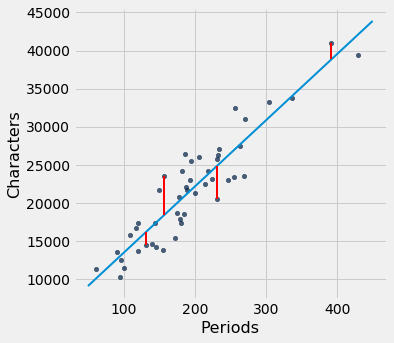

In [35]:
#slope, intercept and errors:

lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')
lw_errors(lw_reg_slope, lw_reg_intercept)

Slope of Regression Line:     50 characters per period
Intercept of Regression Line: 10000 characters


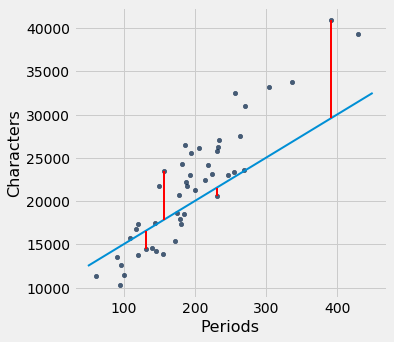

In [36]:
# takes any slope, any intercept and redraws the line and errors from the same 4 points

lw_errors(50, 10000)

Slope of Regression Line:     -100 characters per period
Intercept of Regression Line: 50000 characters


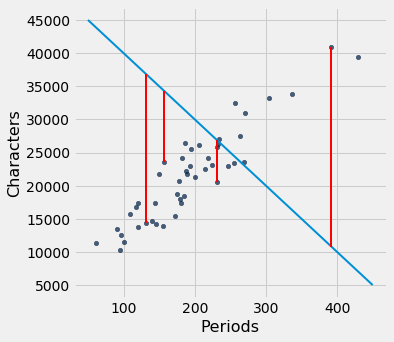

In [37]:
lw_errors(-100, 50000)

In [ ]:
# Which lines are better? The ones with small errors
# Goal: Find the line that minimizes the error

# What exactly will we minimize?

In [38]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Slope of Regression Line:     50 characters per period
Intercept of Regression Line: 10000 characters
Root mean squared error: 4322.16783177


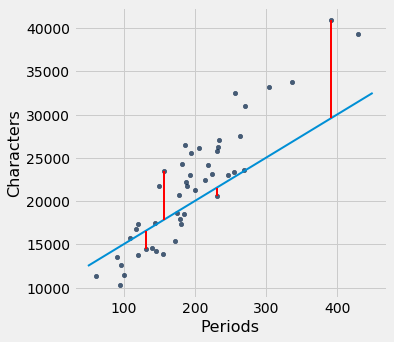

In [39]:
# is the error small or large?
lw_rmse(50, 10000)

Slope of Regression Line:     -100 characters per period
Intercept of Regression Line: 50000 characters
Root mean squared error: 16710.1198374


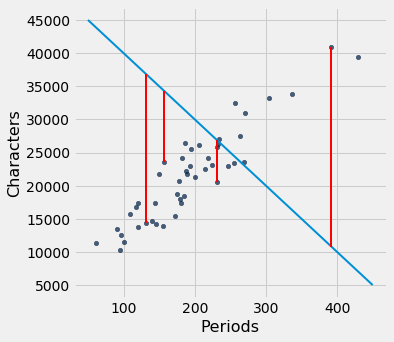

In [40]:
# for comparison

lw_rmse(-100, 50000)

Slope of Regression Line:     90 characters per period
Intercept of Regression Line: 4000 characters
Root mean squared error: 2715.53910638


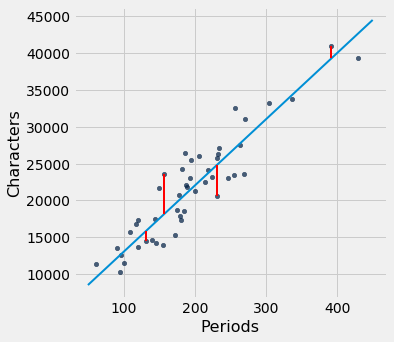

In [41]:
# close to the regression line
lw_rmse(90, 4000)

In [ ]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

In [ ]:
# drop the square root

def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [ ]:
# (back to slides, minimization)

In [ ]:
# What is it going to return?

minimize(lw_mse)

In [ ]:
lw_reg_slope, lw_reg_intercept

In [ ]:
# Discussion question

Image("image_minim.png", width=700, height=150)

In [ ]:
#(back to slides)

## Residuals

In [ ]:
# function to calculate residuals

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)


In [ ]:
heights = heights.with_columns(
        'Fitted Value', fit(heights, 'MidParent', 'Child'),
        'Residual', residual(heights, 'MidParent', 'Child')
    )
heights

In [ ]:
def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)
    
scatter_fit(heights, 'MidParent', 'Child')    

In [ ]:
# A residual plot: plotting the residuals against the predictor variable (midparent height)

def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')


In [ ]:
residual_plot(heights, 'MidParent', 'Child')


In [ ]:
# (back to slides)

## Detecting Non - linearity

In [ ]:
# ages are estimates
dugong = Table.read_table('http://www.statsci.org/data/oz/dugongs.txt')
dugong = dugong.move_to_start('Length')
dugong

In [ ]:
# Length is easy to measure. You know the length, predict the age

correlation(dugong, 'Length', 'Age')

In [ ]:
#helper method

def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)


regression_diagnostic_plots(dugong, 'Length', 'Age')

In [ ]:
# how do you see nonlinearity on this plot? Do you see a pattern?

In [ ]:
# Detecting Heteroscedasticity (uneven spread)

hybrid

In [ ]:
regression_diagnostic_plots(hybrid, 'acceleration', 'mpg')


In [ ]:
# What does it mean? Predictions are not equally accurate for different values of acceleration 


In [ ]:
#Residual Plots are Flat Overall


residual_plot(heights, 'MidParent', 'Child')
correlation(heights, 'MidParent', 'Residual')

In [ ]:
# The Average of the Residuals

round(np.mean(heights.column('Residual')), 10)

## SD of the residuals

No matter what the shape of the original scatter:
$$
  \mbox {SD of residuals} = \sqrt{1-r^2} * \mbox{SD of y}
$$

In [ ]:
np.std(heights.column("Residual"))

In [ ]:
r = correlation(heights, "MidParent", "Child")
np.sqrt(1-r**2)*np.std(heights.column("Child"))